# Capstone Project Notebook

Jupyter Notebook created for the Applied Data Science Capstone Project with Coursera.

In [68]:
import pandas as pd
import numpy as np

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto

# PART 1
### CREATE THE DATAFRAME

In [69]:
import requests
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')


I save the Wikipedia table into My_table. 
You can locate the table from the label "<table" and the class "wikitable sortable".

In [70]:
My_table = soup.find('table',{'class':'wikitable sortable'})
#My_table

Now, for each row in the table, I save in 3 different lists (p_code, Borough, Neighborhood) the data

In [71]:
p_code=[]
Borough=[]
Neighborhood=[]

for row in My_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        p_code.append(cells[0].find(text=True).rstrip())
        Borough.append(cells[1].find(text=True).rstrip())
        Neighborhood.append(cells[2].find(text=True).rstrip())

Using pandas, I create a dataframe with 3 columns: PostalCode, Borough, Neighborhood

In [72]:
df=pd.DataFrame(p_code,columns=['Postal Code'])
df["Borough" ]=Borough
df["Neighborhood"]=Neighborhood
df.head(10)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [73]:
comparison_column_N = np.where(df["Neighborhood"] == "Not assigned", True, False)
comparison_column_B = np.where(df["Borough"] == "Not assigned", True, False)
comparison_column_B == comparison_column_N


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In our case, all the cells that have a Not assigned neighborhood they have also a Not Assigned Borough and viceversa.


In [74]:
#df["Postal Code"].unique

Remove rows with missing data ("Not assigned")

In [75]:
#remove the missing data
df = df[df.Borough != 'Not assigned']
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


Sort the values 

In [76]:
#sort the values 
df = df.sort_values(by=['Postal Code'])
df.head()

,Postal Code,Borough,Neighborhood
9,M1B,Scarborough,"Malvern, Rouge"
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
27,M1E,Scarborough,"Guildwood, Morningside, West Hill"
36,M1G,Scarborough,Woburn
45,M1H,Scarborough,Cedarbrae


Reset the index in order to start from row 0

In [77]:
#reset index (start from 0)
df = df.reset_index(drop=True)
df.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


PRINT OUT THE SHAPE OF THE DATAFRAME

In [78]:
df.shape

(103, 3)

The DataFrame has 3 columns and 103 rows

# PART 2 

### Get the latitude and the longitude coordinates of each neighborhood in Toronto

To get the coordinates I use the Geospatial_Coordinates.csv file 

In [79]:
df_coord = pd.read_csv("Geospatial_Coordinates.csv")
df_coord.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [80]:
df.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


Merging of the two Dataframe (df and df_coord)

In [81]:
#merging of the dataframes df and df_coord with the same column "Postal Code"
df1 = df.merge(df_coord)
df1

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


# PART 3
### CREATE A MAP OF THE NEIGHBORHOODS IN TORONTO

In [82]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


#### Create a map of Toronto with neighborhoods superimposed on top.


Import all the necessary modules

In [178]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

### Use geopy library to get the latitude and longitude values of Toronto.


In [84]:
# take the geographical coordinate of Toronto
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Create map of Toronto using latitude and longitude values with neighborhoods superimposed on top.

In [85]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude,longitude], zoom_start=10)

#add markers to map
for lat, lng, borough, neighborhood in zip(df1['Latitude'], df1['Longitude'], df1['Borough'], df1['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## CLUSTERING
### I decided to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data.

I select only the boroughs that contain the word Toronto,

In [86]:
df_TOR = df1[df1['Borough'].str.contains("Toronto")]
df_TOR = df_TOR.reset_index(drop=True)
df_TOR.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


### create map of Toronto borough using latitude and longitude values

In [87]:
# create map of Toronto borough using latitude and longitude values
map_toronto_borough = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_TOR['Latitude'], df_TOR['Longitude'], df_TOR['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_borough)  
    
map_toronto_borough


## Explore Neighborhoods in Toronto
### Define Foursquare Credentials and Version


In [108]:
CLIENT_ID = '5L1YQGKVMRRQASTMKOZ3N2NZZ31QSFDWWPB04DAKZLHCDFXI' # your Foursquare ID
CLIENT_SECRET = 'H4YFJLWC2YM3F0LX13R4UKLN22XUZJCM3USNLVXJO55OSPCF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5L1YQGKVMRRQASTMKOZ3N2NZZ31QSFDWWPB04DAKZLHCDFXI
CLIENT_SECRET:H4YFJLWC2YM3F0LX13R4UKLN22XUZJCM3USNLVXJO55OSPCF


Now, let's get the top 100 venues that are within a radius of 500 meters.


In [109]:
LIMIT = 100
radius = 500

Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [110]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [111]:
toronto_venues = getNearbyVenues(names=df_TOR['Neighborhood'],
                                   latitudes=df_TOR['Latitude'],
                                   longitudes=df_TOR['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

In [112]:
print(toronto_venues.shape)
toronto_venues.head()

(1622, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


Let's check how many venues were returned for each neighborhood

In [113]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,35,35,35,35,35,35


Let's find out how many unique categories can be curated from all the returned venues

In [114]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 233 uniques categories.


## 3. Analyze Each Neighborhood

In [115]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [116]:
toronto_onehot.shape

(1622, 233)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [117]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.017241,0.0,0.0,0.000000,0.0,0.0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,"Business reply mail Processing Centre, South C...",0.058824,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,Central Bay Street,0.015385,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.015385,0.0,0.0,0.015385,0.0,0.0


Let's confirm the new size

In [118]:
toronto_grouped.shape

(39, 233)

Let's print each neighborhood along with the top 5 most common venues

In [165]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2                Café  0.03
3  Seafood Restaurant  0.03
4              Bakery  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.12
1          Bakery  0.08
2     Coffee Shop  0.08
3  Breakfast Spot  0.08
4             Gym  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
              venue  freq
0       Yoga Studio  0.06
1  Recording Studio  0.06
2        Skate Park  0.06
3    Farmers Market  0.06
4     Burrito Place  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.18
1       Airport Lounge  0.12
2     Airport Terminal  0.12
3          Coffee Shop  0.06
4  Rental Car Location  0.06


----Central Bay Street----
                 venue  freq
0          Co

### Let's put that into a pandas dataframe
First, let's write a function to sort the venues in descending order.

In [166]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [185]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Café,Cheese Shop,Bakery,Seafood Restaurant,Restaurant,Beer Bar,Lounge,Park
1,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Breakfast Spot,Coffee Shop,Grocery Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Skate Park,Light Rail Station,Burrito Place,Farmers Market,Fast Food Restaurant,Butcher,Restaurant,Recording Studio
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Boutique,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Harbor / Marina
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Japanese Restaurant,Café,Bar,Burger Joint,Salad Place,Thai Restaurant,Department Store


## Cluster Neighborhoods
Run *k*-means to cluster the neighborhood into 5 clusters.

In [186]:
Error = []
for i in range(2,11):
    km = KMeans(n_clusters = i).fit(toronto_grouped_clustering)
    Error.append(km.inertia_)
    # Print for every k centroids coordinates
    print('Pre-clustering metrics')
    print('----------------------')
    print('Inertia:', km.inertia_)
    print('Centroids:', km.cluster_centers_)

Pre-clustering metrics
----------------------
Inertia: 2.707769396757983
Centroids: [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0

Pre-clustering metrics
----------------------
Inertia: 1.2469723288951662
Centroids: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.0103706  0.00039355 0.00178253 ... 0.00432003 0.00106695 0.00032237]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Pre-clustering metrics
----------------------
Inertia: 1.1389034479195315
Centroids: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.41233766e-03  0.00000000e+00  0.00000000e+00 ...  4.95955316e-03
  -1.08420217e-19  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.16372449e-02  5.19480519e-04  2.35294118e-03 ...  4.11538462e

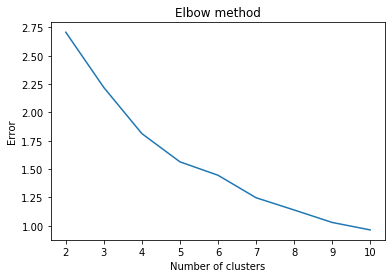

In [187]:
plt.figure()
plt.plot(range(2, 11), Error)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

USING THE ELBOW METHOD I FOUND THE OPTIMAL K

In [188]:
# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 0, 4, 4, 0, 4, 4, 0, 4], dtype=int32)

In [189]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_TOR

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,6,Health Food Store,Trail,Pub,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Restaurant,Furniture / Home Store,Bookstore,Ice Cream Shop,Pub,Pizza Place,Lounge
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Park,Sandwich Place,Fast Food Restaurant,Pizza Place,Food & Drink Shop,Liquor Store,Burrito Place,Restaurant,Italian Restaurant,Ice Cream Shop
3,M4M,East Toronto,Studio District,43.659526,-79.340923,4,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Seafood Restaurant,Sandwich Place
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,5,Park,Swim School,Bus Line,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,4,Park,Gym,Breakfast Spot,Dog Run,Sandwich Place,Food & Drink Shop,Hotel,Department Store,Deli / Bodega,Eastern European Restaurant
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,4,Clothing Store,Coffee Shop,Grocery Store,Sporting Goods Shop,Café,Chinese Restaurant,Diner,Fast Food Restaurant,Mexican Restaurant,Park
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,Pizza Place,Dessert Shop,Sandwich Place,Sushi Restaurant,Coffee Shop,Gym,Italian Restaurant,Café,Seafood Restaurant,Brewery
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,1,Gym,Trail,Women's Store,Dance Studio,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0,Pub,Coffee Shop,Fried Chicken Joint,Liquor Store,Restaurant,Sports Bar,Bank,Bagel Shop,Supermarket,Sushi Restaurant


### Finally, let's visualize the resulting clusters

In [190]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


# Examine Clusters
Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

## CLUSTER 1: 


In [191]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,East Toronto,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Restaurant,Furniture / Home Store,Bookstore,Ice Cream Shop,Pub,Pizza Place,Lounge
2,East Toronto,0,Park,Sandwich Place,Fast Food Restaurant,Pizza Place,Food & Drink Shop,Liquor Store,Burrito Place,Restaurant,Italian Restaurant,Ice Cream Shop
7,Central Toronto,0,Pizza Place,Dessert Shop,Sandwich Place,Sushi Restaurant,Coffee Shop,Gym,Italian Restaurant,Café,Seafood Restaurant,Brewery
9,Central Toronto,0,Pub,Coffee Shop,Fried Chicken Joint,Liquor Store,Restaurant,Sports Bar,Bank,Bagel Shop,Supermarket,Sushi Restaurant
11,Downtown Toronto,0,Coffee Shop,Pizza Place,Restaurant,Café,Italian Restaurant,Pub,Bakery,Chinese Restaurant,Park,Sandwich Place
24,Central Toronto,0,Coffee Shop,Café,Sandwich Place,BBQ Joint,History Museum,Flower Shop,Indian Restaurant,Donut Shop,Liquor Store,Middle Eastern Restaurant
25,Downtown Toronto,0,Café,Bakery,Bookstore,Bar,Italian Restaurant,Japanese Restaurant,Restaurant,Bank,Beer Bar,Beer Store
30,Downtown Toronto,0,Grocery Store,Café,Park,Baby Store,Candy Store,Coffee Shop,Diner,Nightclub,Italian Restaurant,Restaurant
31,West Toronto,0,Pharmacy,Bakery,Grocery Store,Portuguese Restaurant,Brewery,Café,Bar,Bank,Supermarket,Middle Eastern Restaurant
34,West Toronto,0,Mexican Restaurant,Café,Thai Restaurant,Grocery Store,Fried Chicken Joint,Park,Music Venue,Diner,Cajun / Creole Restaurant,Discount Store


## CLUSTER 2: 


In [199]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Central Toronto,1,Gym,Trail,Women's Store,Dance Studio,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


## CLUSTER 3:

In [193]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,2,Garden,Music Venue,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


## CLUSTER 4:

In [200]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Downtown Toronto,3,Park,Playground,Trail,Cupcake Shop,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
23,Central Toronto,3,Park,Jewelry Store,Trail,Sushi Restaurant,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


## CLUSTER 5:

In [195]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5,toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,East Toronto,4,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Seafood Restaurant,Sandwich Place
5,Central Toronto,4,Park,Gym,Breakfast Spot,Dog Run,Sandwich Place,Food & Drink Shop,Hotel,Department Store,Deli / Bodega,Eastern European Restaurant
6,Central Toronto,4,Clothing Store,Coffee Shop,Grocery Store,Sporting Goods Shop,Café,Chinese Restaurant,Diner,Fast Food Restaurant,Mexican Restaurant,Park
12,Downtown Toronto,4,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Bubble Tea Shop,Pub,Yoga Studio,Hotel,Men's Store
13,Downtown Toronto,4,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Theater,Yoga Studio,Cosmetics Shop,Shoe Store
14,Downtown Toronto,4,Clothing Store,Coffee Shop,Cosmetics Shop,Middle Eastern Restaurant,Café,Bubble Tea Shop,Japanese Restaurant,Pizza Place,Bakery,Bookstore
15,Downtown Toronto,4,Coffee Shop,Café,American Restaurant,Gastropub,Cocktail Bar,Restaurant,Creperie,Cosmetics Shop,Clothing Store,Lingerie Store
16,Downtown Toronto,4,Coffee Shop,Cocktail Bar,Café,Cheese Shop,Bakery,Seafood Restaurant,Restaurant,Beer Bar,Lounge,Park
17,Downtown Toronto,4,Coffee Shop,Italian Restaurant,Sandwich Place,Japanese Restaurant,Café,Bar,Burger Joint,Salad Place,Thai Restaurant,Department Store
18,Downtown Toronto,4,Coffee Shop,Restaurant,Café,Gym,Deli / Bodega,Hotel,Thai Restaurant,Salad Place,Bookstore,Bar


## CLUSTER 6:

In [197]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5,toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,5,Park,Swim School,Bus Line,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


## CLUSTER 7:

In [198]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5,toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,6,Health Food Store,Trail,Pub,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run
